<a href="https://colab.research.google.com/github/Kovalivska/Python/blob/Study/Questions_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

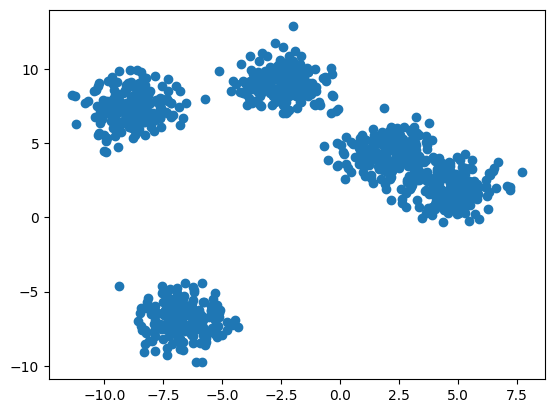

In [6]:
X, _ = make_blobs(n_samples = 1000,
                  centers = 5, random_state =42)
plt.scatter(X[:,0], X[:,1])

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram

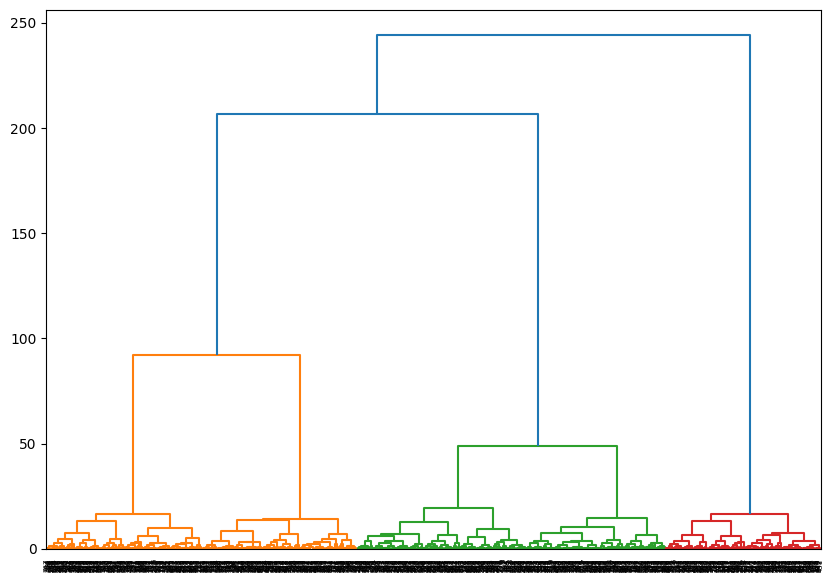

In [8]:
linked = linkage(X, method = 'ward')
plt.figure(figsize = (10,7))
dendrogram(linked,
           orientation = 'top',
           distance_sort = 'descending')
plt.show()

#How to save the model

In [9]:
import pickle

In [10]:
pickle.dump(linked,
            open('linked.pkl', 'wb')

)

In [11]:
with open ('linked.pkl', 'rb') as f:
  linked_loaded = pickle.load(f)

In [12]:
linked_loaded

array([[4.52000000e+02, 8.15000000e+02, 3.52609495e-03, 2.00000000e+00],
       [4.50000000e+02, 9.57000000e+02, 1.09814508e-02, 2.00000000e+00],
       [1.65000000e+02, 3.89000000e+02, 1.11008756e-02, 2.00000000e+00],
       ...,
       [1.99000000e+03, 1.99300000e+03, 9.22360644e+01, 4.01000000e+02],
       [1.99500000e+03, 1.99600000e+03, 2.06660173e+02, 8.00000000e+02],
       [1.99200000e+03, 1.99700000e+03, 2.43970593e+02, 1.00000000e+03]])

In [14]:
from seaborn import load_dataset

In [15]:
df = load_dataset('penguins')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df, test_size = 0.01, random_state = 42)

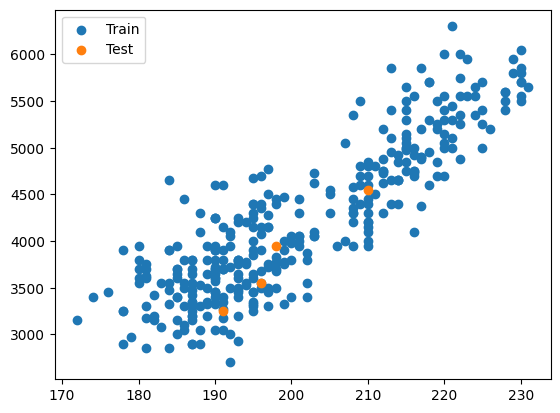

In [18]:
plt.scatter(train['flipper_length_mm'], train['body_mass_g'], label='Train')
plt.scatter(test['flipper_length_mm'], test['body_mass_g'], label='Test')
plt.legend()
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaled_train = MinMaxScaler().fit_transform(train[['flipper_length_mm']])
scaled_test = MinMaxScaler().fit_transform(test[['flipper_length_mm']])

In [21]:

scaled_train.shape

(340, 1)

In [22]:
scaled_train.flatten().shape

(340,)

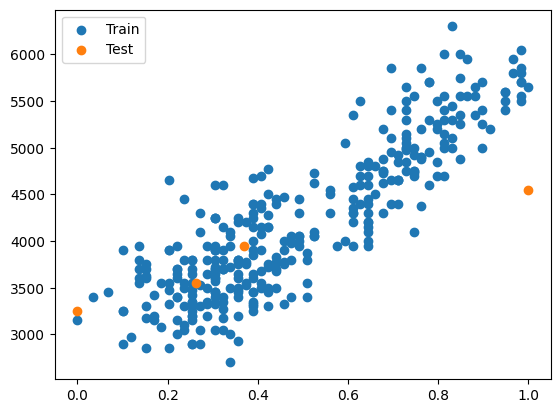

In [23]:
plt.scatter(scaled_train.flatten(), train['body_mass_g'], label ='Train')
plt.scatter(scaled_test.flatten(), test['body_mass_g'], label='Test')
plt.legend()
plt.show()

In [24]:
scaler = MinMaxScaler()
scaler.fit(train[['flipper_length_mm']])
scaled_train = scaler.transform(train[['flipper_length_mm']])
scaled_test = scaler.transform(test[['flipper_length_mm']])

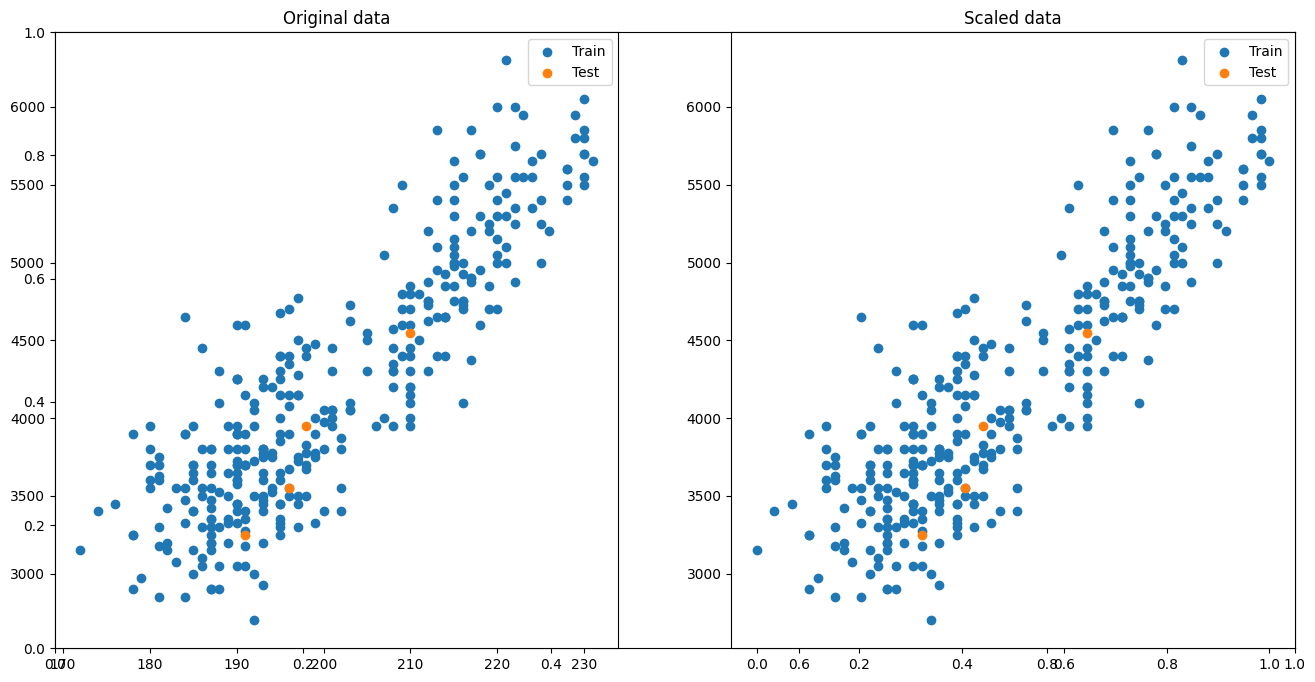

In [25]:
plt.subplots(figsize = (16,8))
plt.subplot(1,2,1)
plt.scatter(train['flipper_length_mm'], train['body_mass_g'], label='Train')
plt.scatter(test['flipper_length_mm'], test['body_mass_g'], label='Test')
plt.legend()
plt.title('Original data')


plt.subplot(1,2,2)
plt.scatter(scaled_train.flatten(), train['body_mass_g'], label ='Train')
plt.scatter(scaled_test.flatten(), test['body_mass_g'], label='Test')
plt.legend()
plt.title('Scaled data')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
pipe = Pipeline(steps = [('scaler', MinMaxScaler()),
                         ('model',LinearRegression())])

In [29]:
df.dropna(inplace=True)
train, test = train_test_split(df, test_size = 0.01, random_state = 42)

In [30]:
pipe.fit(train[['flipper_length_mm']], train['body_mass_g'])

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [31]:
pipe.predict(train[['flipper_length_mm']])

array([3757.11947754, 4763.92590705, 5317.66944328, 3908.14044197,
       3807.45979902, 4210.18237082, 3958.48076344, 4059.16140639,
       4562.56462115, 3807.45979902, 4663.2452641 , 3404.73722722,
       3505.41787017, 3757.11947754, 3505.41787017, 4864.60655   ,
       3958.48076344, 3656.43883459, 5569.37105065, 4310.86301377,
       3203.37594131, 3555.75819164, 4814.26622852, 4814.26622852,
       3203.37594131, 5619.71137213, 3505.41787017, 5670.0516936 ,
       4059.16140639, 4260.5226923 , 5670.0516936 , 4612.90494262,
       3908.14044197, 4562.56462115, 3656.43883459, 3455.07754869,
       3203.37594131, 3656.43883459, 4159.84204935, 4109.50172787,
       3606.09851312, 3505.41787017, 5216.98880033, 3555.75819164,
       3656.43883459, 5116.30815738, 3757.11947754, 5015.62751443,
       4713.58558557, 3153.03561984, 3706.77915607, 5166.64847885,
       3253.71626279, 3908.14044197, 3958.48076344, 4310.86301377,
       5569.37105065, 4914.94687147, 5166.64847885, 3807.45979

In [32]:
pipe.predict(test[['flipper_length_mm']])

array([3052.35497689, 5267.3291218 , 3908.14044197, 4059.16140639])

In [33]:
pickle.dump(pipe, open('pipe.pkl','wb'))

In [34]:
with open('pipe.pkl','rb') as f:
  pipe_loaded = pickle.load(f)

In [35]:
pipe_loaded

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [36]:
pipe_loaded.predict(test[['flipper_length_mm']])

array([3052.35497689, 5267.3291218 , 3908.14044197, 4059.16140639])

In [37]:
test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female


In [38]:
new_data = test.copy()

In [39]:
import pandas as pd

In [40]:
new_data = pd.concat([new_data, new_data], axis=0)
new_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female


In [41]:
new_data['flipper_length_mm'] = [100,200,300,400, 120, 140, 160, 180]

In [42]:
new_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,100,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,200,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,300,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,400,3675.0,Female
30,Adelie,Dream,39.5,16.7,120,3250.0,Female
317,Gentoo,Biscoe,46.9,14.6,140,4875.0,Female
79,Adelie,Torgersen,42.1,19.1,160,4000.0,Male
201,Chinstrap,Dream,49.8,17.3,180,3675.0,Female


In [43]:
new_data['flipper_length_mm']

,flipper_length_mm
30,100
317,200
79,300
201,400
30,120
317,140
79,160
201,180


In [44]:
pipe_loaded.predict(new_data[['flipper_length_mm']])

array([ -874.19009818,  4159.84204935,  9193.87419688, 14227.9063444 ,
         132.61633132,  1139.42276083,  2146.22919033,  3153.03561984])

In [46]:
new_data['predictions'] = pipe_loaded.predict(new_data[['flipper_length_mm']])

In [47]:
new_data[['body_mass_g', 'predictions']]

,body_mass_g,predictions
30,3250.0,-874.190098
317,4875.0,4159.842049
79,4000.0,9193.874197
201,3675.0,14227.906344
30,3250.0,132.616331
317,4875.0,1139.422761
79,4000.0,2146.229190
201,3675.0,3153.035620


#Outliers treating

In [50]:
# Import libraries

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [52]:
sample_with_outliers = pd.read_csv('/sample_detect_outliers.csv')

In [53]:
sample_with_outliers.head()

,identifier,lease,lag_lease,lag_market_value,lag_dividend,lag_loss,lag_cash,lag_tax_rate,lag_big4_auditor
0,1004,1.716172,1.300330,6.953107,0.007855,0,0.036106,0.362751,1
1,1004,1.664240,1.802926,6.736387,0.007212,0,0.021635,0.359671,1
2,1004,1.163486,1.595639,7.090351,0.006781,0,0.006848,0.354971,1
3,1004,1.416672,1.147767,7.346950,0.006755,0,0.027284,0.210000,1
4,1050,0.626734,0.659966,5.562565,0.013321,1,0.065985,0.350000,0


In [54]:
sample_with_outliers.describe()

,identifier,lease,lag_lease,lag_market_value,lag_dividend,lag_loss,lag_cash,lag_tax_rate,lag_big4_auditor
count,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000
mean,57841.428094,1.951751,1.778861,7.625380,0.016864,0.236184,0.196037,0.255268,0.821628
std,66106.400906,3.091940,2.695251,1.731492,0.029755,0.424770,0.223529,0.117834,0.382856
min,1004.000000,0.000000,0.032784,3.607576,0.000000,0.000000,0.000571,0.000000,0.000000
25%,10221.000000,0.485310,0.452138,6.441416,0.000000,0.000000,0.038528,0.210000,1.000000
50%,24171.000000,0.919717,0.845846,7.535678,0.000000,0.000000,0.109758,0.338186,1.000000
75%,116166.000000,1.951153,1.801071,8.730227,0.022831,0.000000,0.262504,0.350000,1.000000
max,315318.000000,34.634146,15.867922,12.190620,0.203976,1.000000,0.960804,0.380506,1.000000


In [56]:
sample_with_outliers.isnull().sum()

,0
identifier,0
lease,0
lag_lease,0
lag_market_value,0
lag_dividend,0
lag_loss,0
lag_cash,0
lag_tax_rate,0
lag_big4_auditor,0


In [57]:
sample_with_outliers.isna().sum()

,0
identifier,0
lease,0
lag_lease,0
lag_market_value,0
lag_dividend,0
lag_loss,0
lag_cash,0
lag_tax_rate,0
lag_big4_auditor,0


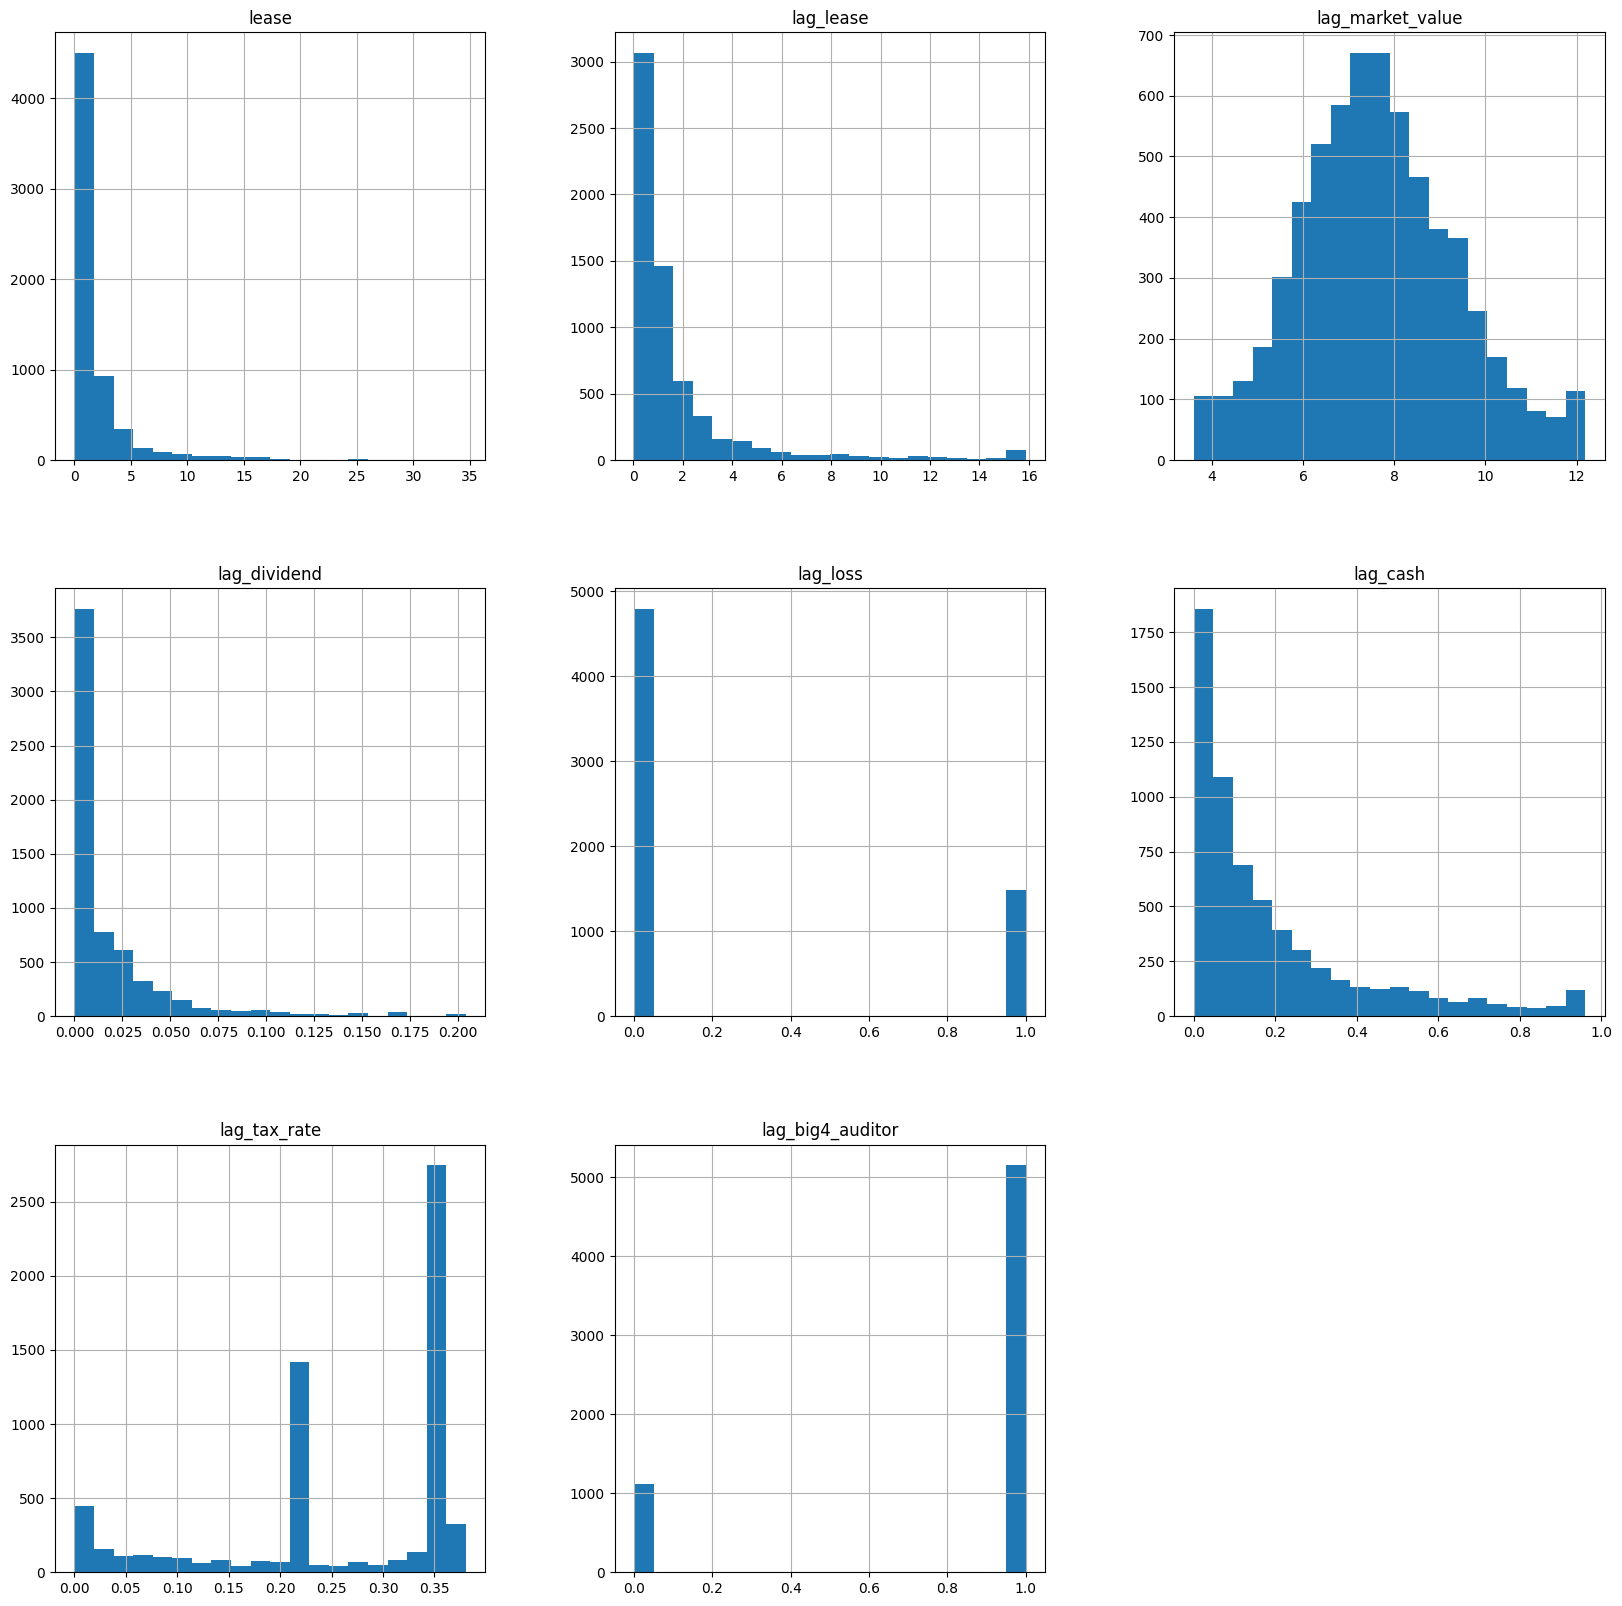

In [58]:
sample_z = sample_with_outliers.drop(columns = 'identifier')
sample_z.hist(bins=20, figsize= (20,20))
plt.show()

In [59]:
var = ['identifier', 'lag_loss', 'lag_big4_auditor', 'lag_tax_rate']
sample_z = sample_with_outliers.drop(columns = var)

In [61]:
#use Z-score aproach (not IQR)
def print_z_score_limits(df, column_name):
  upper_limit = df[column_name].mean() + 3*df[column_name].std()
  lower_limit = df[column_name].mean() - 3*df[column_name].std()

  upper_limit = np.round(upper_limit, 2)
  lower_limit = np.round(lower_limit, 2)
  print(f"Variable name: {column_name} with upper limit {upper_limit} and lower_limit {lower_limit}")

In [62]:
print_z_score_limits(sample_z, 'lag_market_value')

Variable name: lag_market_value with upper limit 12.82 and lower_limit 2.43


In [63]:
sample_z[(sample_z['lag_market_value'] >=2.43) | (sample_z['lag_market_value'] <= 12.82)]

,lease,lag_lease,lag_market_value,lag_dividend,lag_cash
0,1.716172,1.300330,6.953107,0.007855,0.036106
1,1.664240,1.802926,6.736387,0.007212,0.021635
2,1.163486,1.595639,7.090351,0.006781,0.006848
3,1.416672,1.147767,7.346950,0.006755,0.027284
4,0.626734,0.659966,5.562565,0.013321,0.065985
...,...,...,...,...,...
6274,0.126285,0.136685,6.542132,0.022281,0.625824
6275,0.290475,0.243371,7.987532,0.000000,0.042443
6276,0.328224,0.294407,7.933154,0.000000,0.042122
6277,0.187273,0.321876,7.955424,0.000000,0.046604


In [68]:
sample_z.shape

(6279, 5)

In [69]:
sample_z.drop(columns = 'lag_market_value', inplace=True)

In [72]:
sample_z['lag_dividend'] = sample_z['lag_dividend'].replace([0], np.NaN)
sample_z['lease'] = sample_z['lease'].replace([0], np.NaN)

In [73]:
def log_transformation(df, column_name):
  df[[column_name]] = df[[column_name]].apply(np.log)

for column in sample_z.columns:
  log_transformation(sample_z, column)
sample_z.head()

,lease,lag_lease,lag_dividend,lag_cash
0,0.540096,0.262618,-4.846632,-3.321307
1,0.509368,0.589411,-4.932050,-3.833438
2,0.151421,0.467274,-4.993562,-4.983806
3,0.348311,0.137818,-4.997409,-3.601453
4,-0.467234,-0.415567,-4.318397,-2.718330


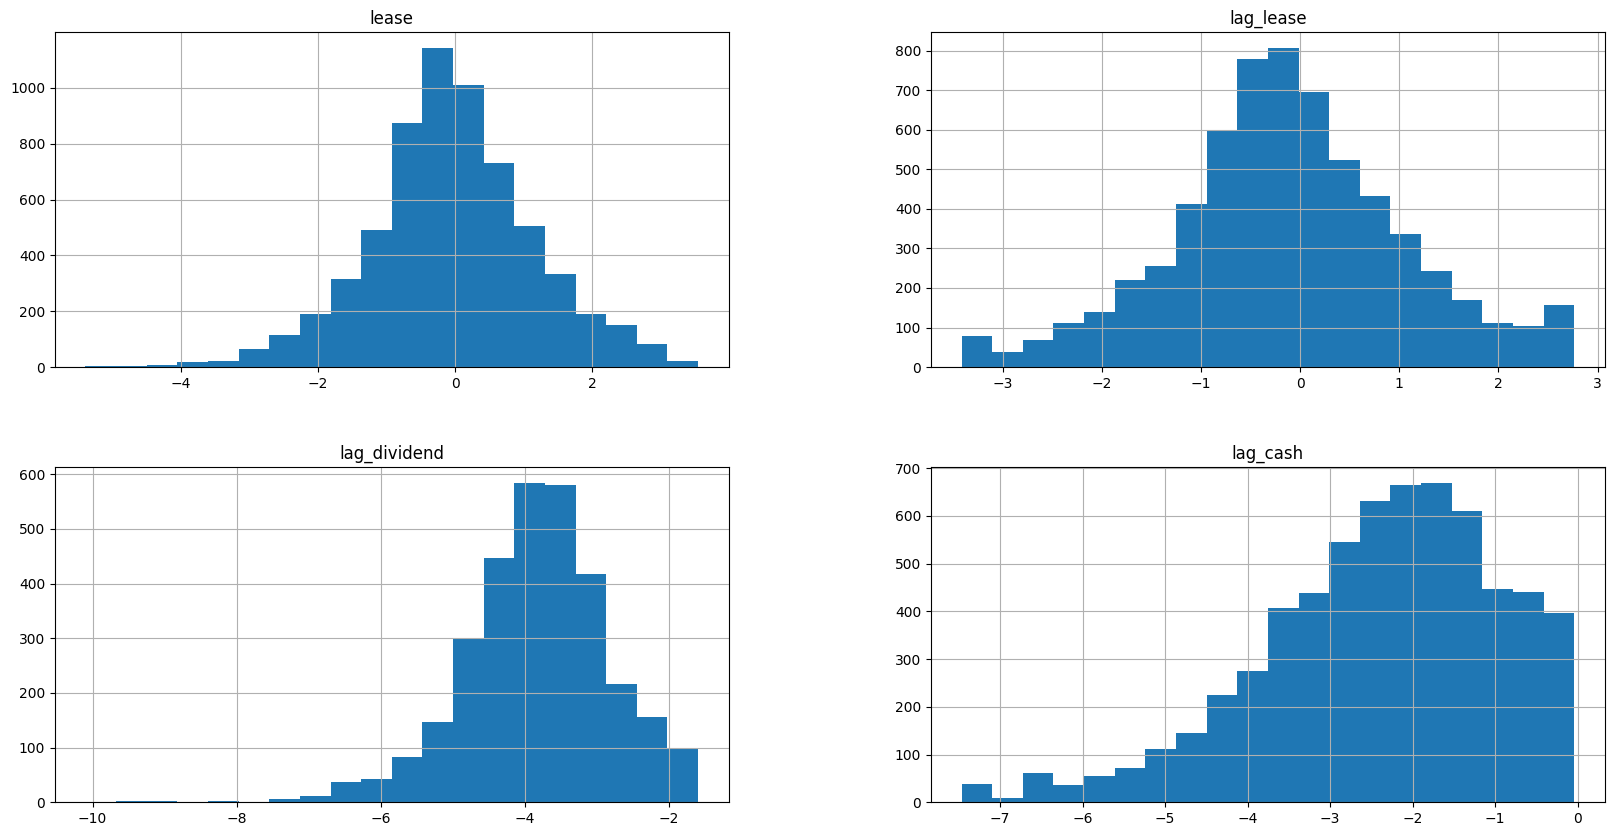

In [75]:
sample_z.hist(bins = 20, figsize = (20,10))
plt.show()

In [76]:
for column in sample_z.columns:
  print_z_score_limits(sample_z, column)

Variable name: lease with upper limit 3.55 and lower_limit -3.64
Variable name: lag_lease with upper limit 3.42 and lower_limit -3.66
Variable name: lag_dividend with upper limit -0.8 and lower_limit -6.86
Variable name: lag_cash with upper limit 1.97 and lower_limit -6.76


In [78]:
sample_z['lease'].shape

(6279,)

In [79]:
sample_z['lag_lease'].shape

(6279,)

In [80]:
sample_z['lag_dividend'].shape

(6279,)

In [81]:
sample_z['lag_cash'].shape

(6279,)